<a href="https://colab.research.google.com/github/eakubrakova/MFTI_2023/blob/main/lecture_07_code_labs_01_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель занятия
На этом занятии мы рассмотрим применение алгоритма K-Means для задачи кластеризации.

K-means (K-средних) - это алгоритм машинного обучения для кластеризации данных. Он пытается разделить набор данных на заранее заданное количество кластеров (K) таким образом, чтобы точки внутри одного кластера были похожи друг на друга, а точки из разных кластеров отличались.

Алгоритм K-средних работает следующим образом:
1. Инициализация: Задается количество кластеров K и выбираются случайные центроиды для каждого кластера.
2. Назначение точек кластерам: Каждая точка данных относится к ближайшему центроиду на основе евклидового расстояния.
3. Пересчет центроидов: Для каждого кластера вычисляется новый центроид, как среднее значение всех точек, отнесенных к этому кластеру.
4. Повторение шагов 2 и 3: Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестанут значительно изменяться или не будет достигнуто максимальное количество итераций.

Алгоритм K-средних стремится минимизировать суммарное квадратичное отклонение точек от центроидов внутри каждого кластера. Он является одним из наиболее популярных и простых алгоритмов кластеризации и широко используется в различных областях, включая анализ данных, обработку изображений и многие другие.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Генерируем случайные данные
np.random.seed(0)
X, _ = make_blobs(n_samples=200, centers=4, random_state=0, cluster_std=0.7)

In [3]:
# Задаем диапазон количества кластеров
min_clusters = 2
max_clusters = 10

# Создаем пустые списки для сохранения значений инерции и коэффициента силуэта
inertias = []
silhouette_scores = []

In [4]:
# Пробуем разное количество кластеров
for n_clusters in range(min_clusters, max_clusters + 1):
    # Применяем алгоритм K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)

    # Сохраняем значения инерции и коэффициента силуэта
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

Метод локтя является одним из распространенных подходов для выбора оптимального количества кластеров в алгоритме K-Means. Он основан на анализе инерции (или суммы квадратов расстояний) внутри кластеров.

Инерция представляет собой меру того, насколько точки внутри каждого кластера близки друг к другу. Чем меньше значение инерции, тем более компактны и плотные кластеры. Цель K-Means - минимизировать инерцию путем нахождения оптимальных центров кластеров.

Метод локтя предполагает, что оптимальное количество кластеров соответствует "локтевой точке" на графике инерции в зависимости от количества кластеров. Идея состоит в том, чтобы выбрать количество кластеров, после которого увеличение количества кластеров приводит к уменьшению инерции с гораздо меньшими темпами. Это может быть интерпретировано как точка, где добавление дополнительных кластеров не приносит значительного улучшения.

На графике метода локтя обычно отображается количество кластеров по оси x и инерция по оси y. Выглядит это как график, который напоминает сгиб руки в локте. Мы ищем "локтевую точку" на этой кривой - точку, где сгиб происходит.

Определение оптимального количества кластеров с использованием метода локтя требует некоторой субъективности, поскольку нет однозначного определения "локтевой точки". Но метод локтя предоставляет важную информацию и помогает принять решение о количестве кластеров, исходя из изменения инерции.

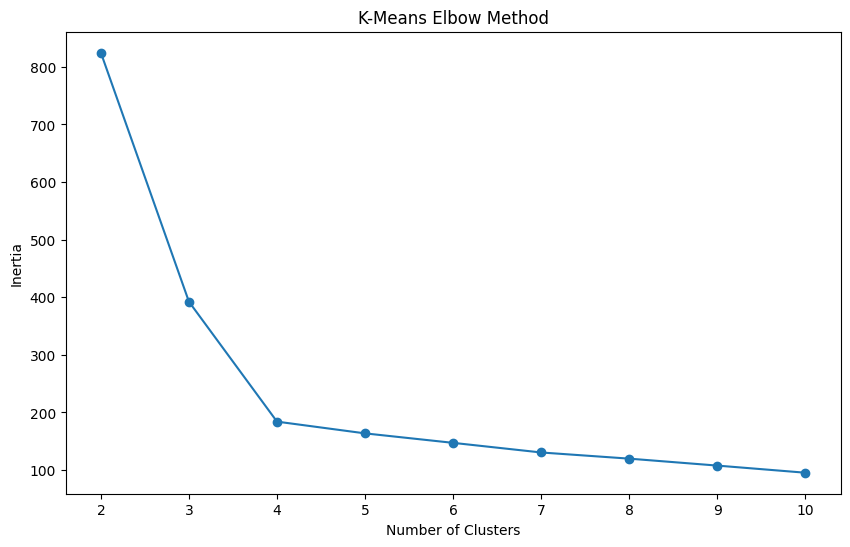

In [5]:
# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), inertias, marker='o')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

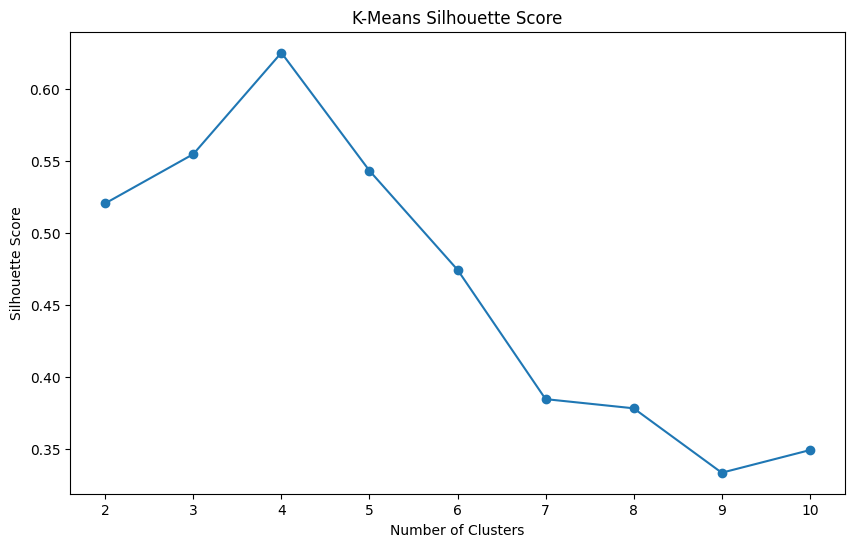

In [6]:
# Визуализация коэффициента силуэта
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.title('K-Means Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

В этом примере мы сначала генерируем случайные данные с помощью функции make_blobs из модуля sklearn.datasets. Мы используем данные с 4 кластерами.

Затем мы задаем диапазон количества кластеров, от min_clusters до max_clusters.

Далее мы создаем пустые списки inertias и silhouette_scores для сохранения значений инерции и коэффициента силуэта для каждого количества кластеров.

Затем мы пробуем разное количество кластеров, применяя алгоритм K-Means для каждого количества кластеров. Мы сохраняем значения инерции (inertias) и коэффициента силуэта (silhouette_scores).

После завершения цикла, мы визуализируем метод локтя, строя график инерции в зависимости от количества кластеров.

Затем мы также визуализируем коэффициент силуэта, строя график коэффициента силуэта в зависимости от количества кластеров.